In [1]:
'''
선형 SVM으로 해결하지 못하는 XOR 문제를 다양한 커널트릭을 사용해 해결
 '''
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.svm import SVC

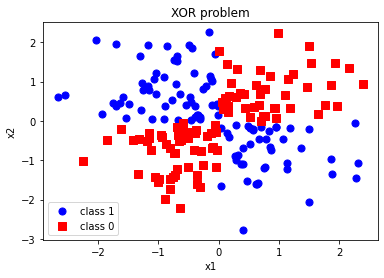

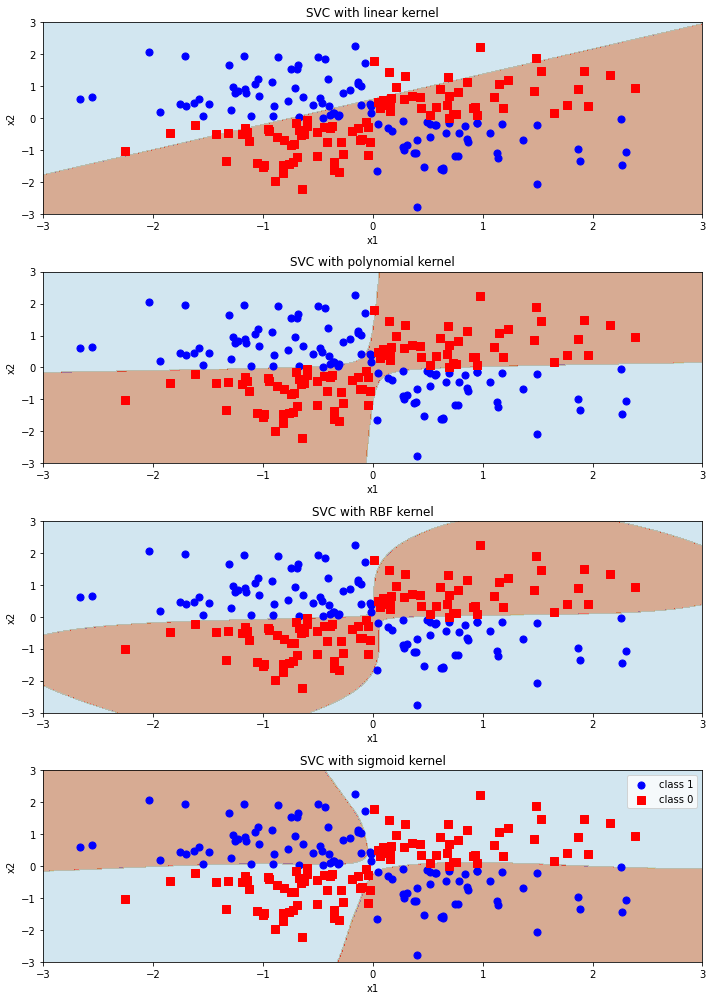

In [2]:

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='o', label='class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='s', label='class 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='class 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR problem")
plt.show()
'''
class sklearn.svm.SVC

C-Support Vector Classification.

Parameters :

# C: float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

# kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm.

# degree: int, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

# gamma: {‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

# coef0: float, default=0.0
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

etc ...
'''


'''
다항 커널, rbf 커널, sigmoid 커널과 비교
'''
svc = SVC(kernel="linear").fit(X_xor, y_xor)
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor) # 다항커널
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)  # rbf 커널
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)  # sigmoid 커널널
plt.figure(figsize=(10, 14))
plt.subplot(411)
plot_xor(X_xor, y_xor, svc, "SVC with linear kernel")
plt.subplot(412)
plot_xor(X_xor, y_xor, polysvc, "SVC with polynomial kernel")
plt.subplot(413)
plot_xor(X_xor, y_xor, rbfsvc, "SVC with RBF kernel")
plt.subplot(414)
plot_xor(X_xor, y_xor, sigmoidsvc, "SVC with sigmoid kernel")
plt.tight_layout()
plt.legend()
plt.show()